In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("/Users/nourrasheed/Downloads/dogs_and_cats"))
import PIL
import os
from PIL import Image

['dogs', 'dogs_resized', 'cats', '.DS_Store', 'test', 'train', 'cats_resized']


In [2]:
FAST_RUN = False
IMAGE_WIDTH=300
IMAGE_HEIGHT=300
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:

dogs_file= os.listdir("/Users/nourrasheed/Downloads/dogs_and_cats/dogs")
#resize the images 
path = r'/Users/nourrasheed/Downloads/dogs_and_cats/dogs'

 #dogs_file, e = os.path.splitext(path+file)


       # if os.path.isfile(path+file):
for file_name in dogs_file: 
    if file_name == '.DS_Store':
        continue 
    print("Processing %s" % file_name)
    im = Image.open(os.path.join("/Users/nourrasheed/Downloads/dogs_and_cats/dogs", file_name))
    output = im.resize((300,300), Image.ANTIALIAS)
    output_file_name = os.path.join("/Users/nourrasheed/Downloads/dogs_and_cats/dogs_resized", file_name)
    output.save(output_file_name ,'JPEG', quality=90)
    print("All done")

Processing dog.1753.jpg
All done
Processing dog.3144.jpg
All done
Processing dog.775.jpg
All done
Processing dog.3622.jpg
All done
Processing dog.1035.jpg
All done
Processing dog.1021.jpg
All done
Processing dog.3636.jpg
All done
Processing dog.2528.jpg
All done
Processing dog.761.jpg
All done
Processing dog.3150.jpg
All done
Processing dog.1747.jpg
All done
Processing dog.991.jpg
All done
Processing dog.2266.jpg
All done
Processing dog.3178.jpg
All done
Processing dog.749.jpg
All done
Processing dog.1009.jpg
All done
Processing dog.2500.jpg
All done
Processing dog.2514.jpg
All done
Processing dog.985.jpg
All done
Processing dog.2272.jpg
All done
Processing dog.3187.jpg
All done
Processing dog.2299.jpg
All done
Processing dog.1790.jpg
All done
Processing dog.1948.jpg
All done
Processing dog.3839.jpg
All done
Processing dog.1784.jpg
All done
Processing dog.3193.jpg
All done
Processing dog.1974.jpg
All done
Processing dog.952.jpg
All done
Processing dog.3805.jpg
All done
Processing dog.3

In [3]:
dogs_resized=os.listdir("/Users/nourrasheed/Downloads/dogs_and_cats/dogs_resized")

In [4]:
counter=0
for item in dogs_resized:
    # Incrementing counter variable to get each item in the list
    counter = counter + 1
print(counter) 

4000


In [6]:
#resize the cats images 
cats_file= os.listdir("/Users/nourrasheed/Downloads/dogs_and_cats/cats")

path = r'/Users/nourrasheed/Downloads/dogs_and_cats/cats'

for file_name in cats_file: 
    if file_name == '.DS_Store':
        continue 
    print("Processing %s" % file_name)
    im = Image.open(os.path.join("/Users/nourrasheed/Downloads/dogs_and_cats/cats", file_name))
    output = im.resize((300,300), Image.ANTIALIAS)
    output_file_name = os.path.join("/Users/nourrasheed/Downloads/dogs_and_cats/cats_resized", file_name)
    output.save(output_file_name ,'JPEG', quality=90)
    print("All done")

Processing cat.2718.jpg
All done
Processing cat.3406.jpg
All done
Processing cat.1211.jpg
All done
Processing cat.1577.jpg
All done
Processing cat.952.jpg
All done
Processing cat.3360.jpg
All done
Processing cat.946.jpg
All done
Processing cat.3374.jpg
All done
Processing cat.1563.jpg
All done
Processing cat.1205.jpg
All done
Processing cat.3412.jpg
All done
Processing cat.2724.jpg
All done
Processing cat.2042.jpg
All done
Processing cat.3348.jpg
All done
Processing cat.2056.jpg
All done
Processing cat.2730.jpg
All done
Processing cat.1239.jpg
All done
Processing cat.6.jpg
All done
Processing cat.2903.jpg
All done
Processing cat.749.jpg
All done
Processing cat.991.jpg
All done
Processing cat.985.jpg
All done
Processing cat.2917.jpg
All done
Processing cat.1588.jpg
All done
Processing cat.2081.jpg
All done
Processing cat.775.jpg
All done
Processing cat.761.jpg
All done
Processing cat.2095.jpg
All done
Processing cat.588.jpg
All done
Processing cat.3162.jpg
All done
Processing cat.1775.j

In [5]:
cats_resized=os.listdir("/Users/nourrasheed/Downloads/dogs_and_cats/cats_resized")

In [6]:
counter=0
for item in cats_resized:
    # Incrementing counter variable to get each item in the list
    counter = counter + 1
print(counter)

4000


(300, 300)


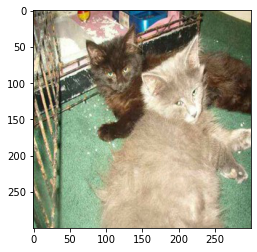

In [7]:
sample = random.choice(cats_resized)
image = load_img("/Users/nourrasheed/Downloads/dogs_and_cats/cats_resized/"+sample)
plt.imshow(image)
print (image.size)

(300, 300)


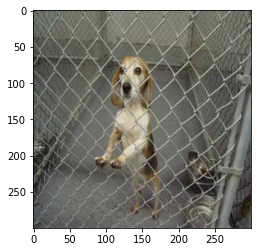

In [8]:
sample = random.choice(dogs_resized)
image = load_img("/Users/nourrasheed/Downloads/dogs_and_cats/dogs_resized/"+sample)
plt.imshow(image)
print (image.size)

In [11]:


categories = []
for filename in dogs_resized:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': dogs_resized,
    'category': categories
})

In [12]:
df.head()

,filename,category
0,dog.1753.jpg,1
1,dog.3144.jpg,1
2,dog.775.jpg,1
3,dog.3622.jpg,1
4,dog.1035.jpg,1


In [13]:
df.tail()

,filename,category
3995,dog.2531.jpg,1
3996,dog.1038.jpg,1
3997,dog.2525.jpg,1
3998,dog.2243.jpg,1
3999,dog.1992.jpg,1


In [14]:
df.describe

<bound method NDFrame.describe of           filename  category
0     dog.1753.jpg         1
1     dog.3144.jpg         1
2      dog.775.jpg         1
3     dog.3622.jpg         1
4     dog.1035.jpg         1
...            ...       ...
3995  dog.2531.jpg         1
3996  dog.1038.jpg         1
3997  dog.2525.jpg         1
3998  dog.2243.jpg         1
3999  dog.1992.jpg         1

[4000 rows x 2 columns]>

In [15]:


categories1 = []
for filename in cats_resized:
    category = filename.split('.')[0]
    if category == 'cat':
        categories1.append(0)
    else:
        categories1.append(1)

df1 = pd.DataFrame({
    'filename': cats_resized ,
    'category': categories1
})


In [16]:
df1.head()

,filename,category
0,cat.2718.jpg,0
1,cat.3406.jpg,0
2,cat.1211.jpg,0
3,cat.1577.jpg,0
4,cat.952.jpg,0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  4000 non-null   object
 1   category  4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


In [18]:
df1.isna().sum()

filename    0
category    0
dtype: int64

In [19]:

for file_name in cats_resized: 
    if file_name == '.DS_Store':
        continue 
    
    im = Image.open(os.path.join("/Users/nourrasheed/Downloads/dogs_and_cats/cats_resized", file_name))
    output_file_name = os.path.join("/Users/nourrasheed/Downloads/dogs_and_cats/train", file_name)
    im.save(output_file_name ,'JPEG', quality=90)
  

In [20]:


for file_name in dogs_resized: 
    if file_name == '.DS_Store':
        continue 
  
    im = Image.open(os.path.join("/Users/nourrasheed/Downloads/dogs_and_cats/dogs_resized", file_name))
    
    output_file_name = os.path.join("/Users/nourrasheed/Downloads/dogs_and_cats/train", file_name)
    im.save(output_file_name ,'JPEG', quality=90)
  

In [9]:
train_file=os.listdir("/Users/nourrasheed/Downloads/dogs_and_cats/train")

In [10]:
categories1 = []
for filename in train_file:
    category = filename.split('.')[0]
    if category == 'cat':
        categories1.append(0)
    else:
        categories1.append(1)

data = pd.DataFrame({
    'filename': train_file ,
    'category': categories1
})

In [20]:
#data=pd.merge(df,df1,how='outer')
#data

,filename,category
0,dog.1753.jpg,1
1,dog.3144.jpg,1
2,dog.775.jpg,1
3,dog.3622.jpg,1
4,dog.1035.jpg,1
...,...,...
7995,cat.793.jpg,0
7996,cat.2067.jpg,0
7997,cat.3379.jpg,0
7998,cat.1208.jpg,0


In [11]:
print(data)

          filename  category
0     cat.2718.jpg         0
1     cat.3406.jpg         0
2     dog.1753.jpg         1
3     cat.1211.jpg         0
4     dog.3144.jpg         1
...            ...       ...
6396  dog.2525.jpg         1
6397  cat.1208.jpg         0
6398  dog.2243.jpg         1
6399  dog.1992.jpg         1
6400  cat.2701.jpg         0

[6401 rows x 2 columns]


In [12]:
data.head()

,filename,category
0,cat.2718.jpg,0
1,cat.3406.jpg,0
2,dog.1753.jpg,1
3,cat.1211.jpg,0
4,dog.3144.jpg,1


In [13]:
data.tail()

,filename,category
6396,dog.2525.jpg,1
6397,cat.1208.jpg,0
6398,dog.2243.jpg,1
6399,dog.1992.jpg,1
6400,cat.2701.jpg,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6401 entries, 0 to 6400
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6401 non-null   object
 1   category  6401 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 100.1+ KB


In [15]:
data.describe

<bound method NDFrame.describe of           filename  category
0     cat.2718.jpg         0
1     cat.3406.jpg         0
2     dog.1753.jpg         1
3     cat.1211.jpg         0
4     dog.3144.jpg         1
...            ...       ...
6396  dog.2525.jpg         1
6397  cat.1208.jpg         0
6398  dog.2243.jpg         1
6399  dog.1992.jpg         1
6400  cat.2701.jpg         0

[6401 rows x 2 columns]>

<AxesSubplot:>

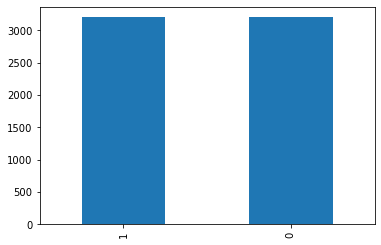

In [16]:
data['category'].value_counts().plot.bar()

In [30]:
#from sklearn.utils import shuffle
#df = shuffle(data)
#df

,filename,category
2026,dog.1041.jpg,1
3717,dog.2794.jpg,1
4950,dog.2864.jpg,1
3492,cat.1859.jpg,0
1674,dog.1254.jpg,1
...,...,...
2752,cat.1063.jpg,0
6230,dog.2479.jpg,1
183,dog.1182.jpg,1
2631,cat.1498.jpg,0


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

2022-12-15 13:12:13.166913: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 298, 298, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 149, 149, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 147, 147, 64)     2

In [18]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early Stop

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased




In [19]:
earlystop = EarlyStopping(patience=18)

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [21]:
callbacks = [earlystop, learning_rate_reduction]

In [25]:
data["category"] = data["category"].replace({0: 'cat', 1: 'dog'}) 



In [26]:
train_df, validate_df = train_test_split(data, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

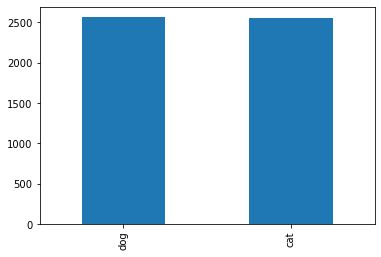

In [27]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

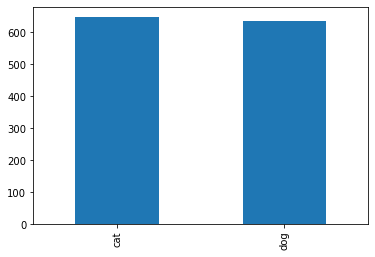

In [28]:
validate_df['category'].value_counts().plot.bar()

In [29]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [71]:
import os
import cv2
file_id=train_df['filename'].iloc[0]
print (file_id)
sdir=r'"/Users/nourrasheed/Downloads/dogs_and_cats/train'
file_path=os.path.join(sdir, file_id) # should be full path to the image file
print(file_path)
try:
    image=cv2.imread(file_path)
    shape=image.shape
    print(shape)
except:
    print('Invalid image file')

dog.185.jpg
"/Users/nourrasheed/Downloads/dogs_and_cats/train/dog.185.jpg
Invalid image file


[ WARN:0@5771.397] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('"/Users/nourrasheed/Downloads/dogs_and_cats/train/dog.185.jpg'): can't open/read file: check file path/integrity


In [30]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
     "/Users/nourrasheed/Downloads/dogs_and_cats/train",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5120 validated image filenames belonging to 2 classes.


In [31]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/Users/nourrasheed/Downloads/dogs_and_cats/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1280 validated image filenames belonging to 2 classes.


/opt/anaconda3/lib/python3.9/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [32]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/Users/nourrasheed/Downloads/dogs_and_cats/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


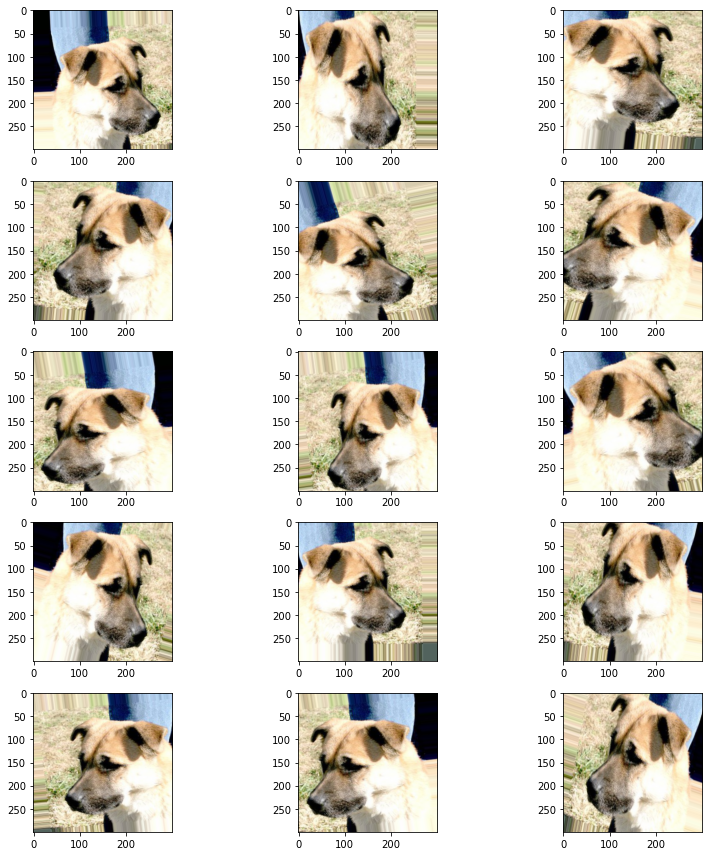

In [33]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [34]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

/var/folders/rz/zf17d6lx17l6znyrq9kczqw40000gn/T/ipykernel_50471/612699584.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
341/341 [==============================] - 823s 2s/step - loss: 1.0757 - accuracy: 0.5708 - val_loss: 0.8905 - val_accuracy: 0.4769 - lr: 0.0010
Epoch 2/50
341/341 [==============================] - 825s 2s/step - loss: 0.7168 - accuracy: 0.6108 - val_loss: 0.6133 - val_accuracy: 0.6463 - lr: 0.0010
Epoch 3/50
341/341 [==============================] - 816s 2s/step - loss: 0.6213 - accuracy: 0.6660 - val_loss: 0.6322 - val_accuracy: 0.6918 - lr: 0.0010
Epoch 4/50
341/341 [==============================] - 811s 2s/step - loss: 0.5902 - accuracy: 0.6981 - val_loss: 0.5675 - val_accuracy: 0.7114 - lr: 0.0010
Epoch 5/50
341/341 [==============================] - 811s 2s/step - loss: 0.5703 - accuracy: 0.7081 - val_loss: 0.4897 - val_accuracy: 0.7639 - lr: 0.0010
Epoch 6/50
341/341 [==============================] - 811s 2s/step - loss: 0.5409 - accuracy: 0.7297 - val_loss: 0.6127 - val_accuracy: 0.6980 - lr: 0.0010
Epoch 7/50
341/341 [==============================] - ETA: 0s - 

In [35]:
model.save_weights("model1.h5")

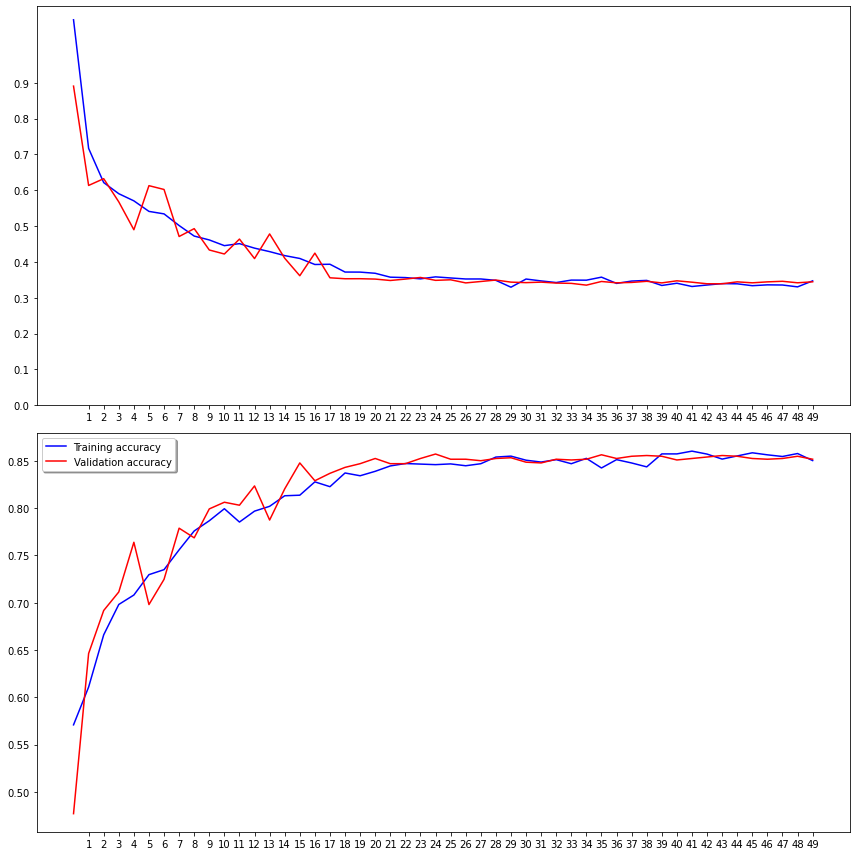

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [42]:
test_filenames = os.listdir("/Users/nourrasheed/Downloads/dogs_and_cats/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [43]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/Users/nourrasheed/Downloads/dogs_and_cats/test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 1600 validated image filenames.
